         Species  Weight  Length   Age  TailLength   Height  Width Gender  \
0      Iguanadon  1650.0    59.0  63.4        68.0  10.8120  7.480      M   
1    Pterodactyl   145.0    22.0  24.0        25.5   6.3750  3.825      M   
2    Pterodactyl   820.0    37.1  40.0        42.5  11.1350  6.630      F   
3  Brachiosaurus   242.0    23.2  25.4        30.0  11.5200  4.020      F   
4    Pterodactyl   650.0    36.5  39.0        41.4  11.1366  6.003      M   

   Completeness  
0         0.545  
1         0.531  
2         0.661  
3         0.793  
4         0.931  
   Species  Weight  Length   Age  TailLength   Height   Width  Gender  \
0        2   290.0    24.0  26.3        31.2  12.4800  4.3056       0   
1        2   850.0    32.8  36.0        41.6  16.8896  6.1984       1   
2        2   390.0    27.6  30.0        35.0  12.6700  4.6900       0   
3        4   270.0    23.6  26.0        28.7   8.3804  4.2476       0   
4        1   150.0    20.5  22.5        24.0   6.7920  3.6240   

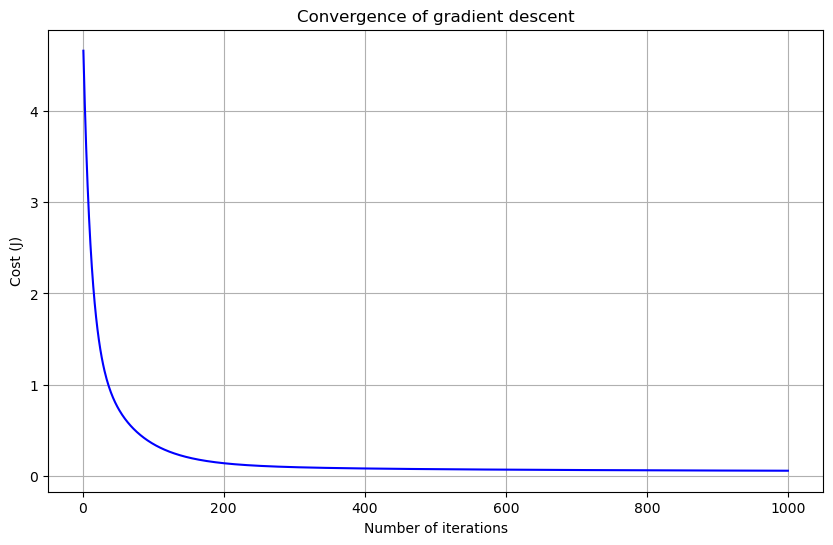

R-squared (R²) value: 0.8579


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\asus\Downloads\dinos.csv")

print(data.head())

columns_to_encode = ["Species", "Gender"]
label_mappings = {}
for column in columns_to_encode:
    unique_categories = data[column].unique()
    label_mapping = {}
    for i, category in enumerate(unique_categories):
        label_mapping[category] = i
    label_mappings[column] = label_mapping

for column, label_mapping in label_mappings.items():
    data[column] = data[column].map(label_mapping)

data = data.sample(frac=1, random_state=42).reset_index(drop=True)
print(data.head())

split_ratio = 0.7
split_index = int(split_ratio * len(data))
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

X_train = train_data.drop("Weight", axis=1)
y_train = train_data["Weight"]
X_test = test_data.drop("Weight", axis=1)
y_test = test_data["Weight"]

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

weights = np.random.randn(X_train.shape[1])
learning_rate = 0.01
iterations = 1000
cost_history = []

def cost_function(X, y, weights):
    N = len(y)
    predictions = np.dot(X, weights)
    error = predictions - y
    cost = (1 / (2 * N)) * np.dot(error.T, error)
    return cost

for i in range(iterations):
    predictions = np.dot(X_train, weights)
    error = predictions - y_train
    gradient = (1 / len(y_train)) * np.dot(X_train.T, error)
    weights -= learning_rate * gradient
    cost = cost_function(X_train, y_train, weights)
    cost_history.append(cost)

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

predictions_test = np.dot(X_test, weights)

y_mean = y_test.mean()
tss = ((y_test - y_mean) ** 2).sum()
rss = ((y_test - predictions_test) ** 2).sum()
r_squared = 1 - (rss / tss)

print(f'R-squared (R²) value: {r_squared:.4f}')
